### Model Training
#### 1.1 Importing required packages and data

In [5]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Importing CSV data as pandas dataframe

In [15]:
df=pd.read_csv(r'D:\End to End Project\notebooks\data\stud.csv')

In [16]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Preparing X and Y variables

In [17]:
X = df.drop(columns=['math_score'],axis=1)

In [18]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [19]:
## Unique Values for each and every feature

print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [20]:
y=df['math_score']

In [21]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [23]:
## Create column transformer with 3 types of transformers

num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
cat_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("One Hot Encoder", cat_transformer, cat_features),
        ('Standard Scaler', numeric_transformer, num_features),
    ]
)

In [24]:
X=preprocessor.fit_transform(X)

In [26]:
X.shape

(1000, 19)

In [31]:
# Seperate dataset into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=23)
X.shape, y.shape

((1000, 19), (1000,))

### Create a eavaluation function after model training

In [35]:
def evaluate_model(true, predicted):
    mae=mean_absolute_error(true, predicted)
    mse=mean_squared_error(true, predicted)
    rsme=np.sqrt(mean_squared_error(true, predicted))
    r2_square=r2_score(true, predicted)
    return mae, rsme, r2_square

In [39]:
models={
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "AdaBoost Regressor": AdaBoostRegressor()
}


model_list=[]
evaluation=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train, y_train) #Train model
    
    #Predict model
    y_train_predict=model.predict(X_train) 
    y_test_predict=model.predict(X_test)
    
    #Evaluate Train and Test dataset
    mae_train, rsme_train, r2_square_train = evaluate_model(y_train, y_train_predict)
    mae_test, rsme_test, r2_square_test = evaluate_model(y_test, y_test_predict)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(rsme_train))
    print("- Mean Absolute Error: {:.4f}".format(mae_train))
    print("- R2 Score: {:.4f}".format(r2_square_train))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(rsme_test))
    print("- Mean Absolute Error: {:.4f}".format(mae_test))
    print("- R2 Score: {:.4f}".format(r2_square_test))
    evaluation.append(r2_square_test)
    
    print('='*35)
    print('\n')
    
    

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.2592
- Mean Absolute Error: 4.1681
- R2 Score: 0.8815
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.6218
- Mean Absolute Error: 4.5734
- R2 Score: 0.8524


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5500
- Mean Absolute Error: 5.1997
- R2 Score: 0.8162
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5967
- Mean Absolute Error: 5.1005
- R2 Score: 0.7967


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.2594
- Mean Absolute Error: 4.1672
- R2 Score: 0.8815
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.6191
- Mean Absolute Error: 4.5672
- R2 Score: 0.8525


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7654
- Mean Absolute Error: 4.5678
- R2 Score: 0.8576
-----------------------

### Results

In [41]:
pd.DataFrame(list(zip(model_list, evaluation)), columns=['Model_name', 'R2_score']).sort_values(by=['R2_score'], ascending=False)

,Model_name,R2_score
2,Ridge,0.852517
0,Linear Regression,0.852377
5,Random Forest Regressor,0.805150
7,AdaBoost Regressor,0.796944
1,Lasso,0.796734
6,XGBRegressor,0.786663
3,K-Neighbors Regressor,0.764103
4,Decision Tree,0.652968


## Linear Regression

In [47]:
lin_reg=LinearRegression()
lin_model=lin_reg.fit(X_train, y_train)
y_pred=lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 85.24


### Plot y_pred and y_test

Text(0, 0.5, 'Predicted')

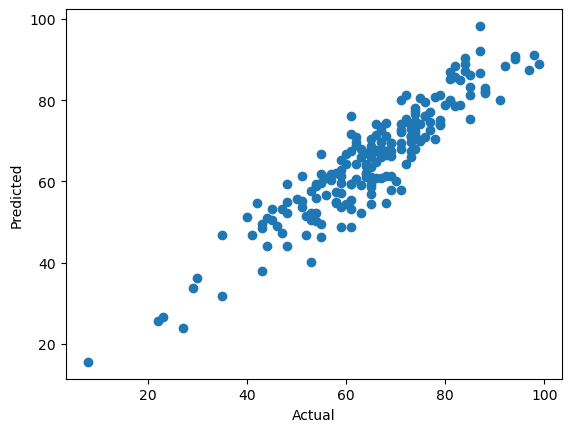

In [48]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

<AxesSubplot:xlabel='math_score'>

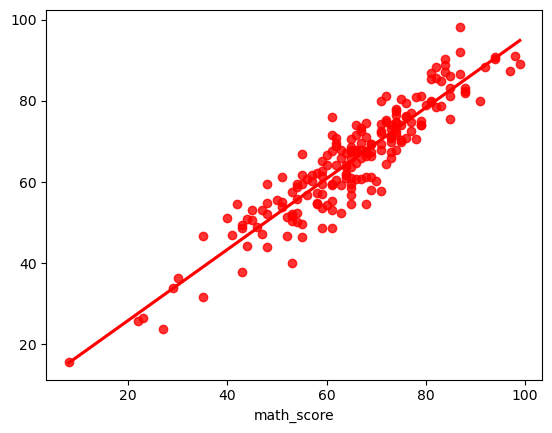

In [49]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')

### Difference Between Actual and Predicted values

In [50]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
519,67,66.003977,0.996023
837,75,69.919265,5.080735
208,74,67.990259,6.009741
525,68,71.094116,-3.094116
978,55,49.586599,5.413401
...,...,...,...
647,64,61.992020,2.007980
481,52,46.828127,5.171873
134,74,73.568230,0.431770
366,69,57.981808,11.018192
